# **Machine Learning with Scikit-Learn**

# Data Processing with SKlearn

In [1]:
import pandas as pd
import seaborn as sns
df_titan = pd.read_csv('titanic_train.csv')
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Imputation

Imputation = the insertion of a value to stand in for missing data

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
imp = SimpleImputer(strategy='mean') #Use mean to impute all datas 

IterativeImputer = modeling each feature with missing values as a function of other features in a round-robin fashion.

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
#imp = IterativeImputer(n_nearest_features=2)

KNNImputer = using its nearest neighbor to show its imputer

In [5]:
from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")

In [7]:
imp.fit(df_titan[['Age']])

SimpleImputer()

In [8]:
df_titan['Age'] = imp.transform(df_titan[['Age']])

In [ ]:
#df_titan['Age'] = imp.fit_transform(df_titan[['Age']])

In [9]:
df_titan #SO this data using mean strategy to input the missing data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [10]:
df_titan['Age'].isnull().sum() #This is a command to check whether this have a misisng data
#Yeah now don't really have any missing data anymore 

0

Using 'Most_frequent' as imputer

In [11]:
imp = SimpleImputer(strategy='most_frequent')

In [12]:
df_titan = pd.DataFrame(imp.fit_transform(df_titan))  # return a ndarray

In [13]:
df_titan.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,B96 B98,S


## Scaling

### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

StandardScaler = Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [15]:
df_titan = pd.read_csv('titanic_train.csv')

In [16]:
#make sure df_titan is a dataframe to use column name Age
df_titan['Age'] = scaler.fit_transform(df_titan[['Age']])
#df_titan[5] = scaler.fit_transform(df_titan[[5]])

In [17]:
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,8.0500,NaN,S


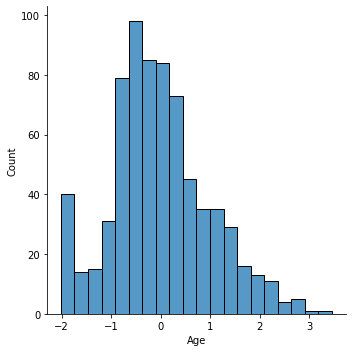

In [18]:
sns.displot(df_titan['Age'])
#sns.displot(df_titan[5])

### MinMaxScaling

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
df_titan['Age'] = scaler.fit_transform(df_titan[['Age']])
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,NaN,S


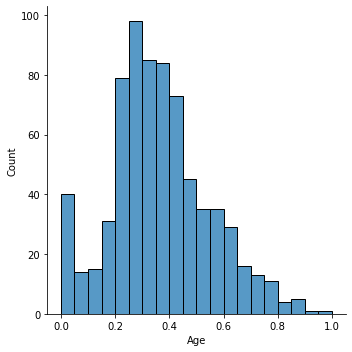

In [21]:
sns.displot(df_titan['Age'])

## Ordinal and OneHot Encoding

Ordinal = transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.

OneHot  = The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [23]:
df_titan['Sex'] = enc.fit_transform(df_titan[['Sex']])
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,0.271174,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,0.434531,0,0,373450,8.0500,NaN,S


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [25]:
enc.fit_transform(df_titan[['Sex']])

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [26]:
df_titan['Sex'] = enc.fit_transform(df_titan[['Sex']])
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris","(0, 1)\t1.0\n (1, 0)\t1.0\n (2, 0)\t1.0\n ...",0.271174,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","(0, 1)\t1.0\n (1, 0)\t1.0\n (2, 0)\t1.0\n ...",0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina","(0, 1)\t1.0\n (1, 0)\t1.0\n (2, 0)\t1.0\n ...",0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","(0, 1)\t1.0\n (1, 0)\t1.0\n (2, 0)\t1.0\n ...",0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry","(0, 1)\t1.0\n (1, 0)\t1.0\n (2, 0)\t1.0\n ...",0.434531,0,0,373450,8.0500,NaN,S


# Supervised Learning with Basic Decision Tree

## Step 1: Creating Training/Testing Dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
iris = sns.load_dataset('iris')

In [29]:
#split dataset in features and target variable
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]  # Features
y = iris.species  # Target variable

In [30]:
from sklearn.model_selection import train_test_split  # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

In [31]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


## Step 2: Instantiating the classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier

In [33]:
# Create Decision Tree classifer object with all default argument
clf = DecisionTreeClassifier()

## Step 3: Training the classifier

In [35]:
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

## Step 4: Making the prediction

In [36]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Step 5: Evaluating the performance

In [37]:
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Step 6: Visualizing the tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

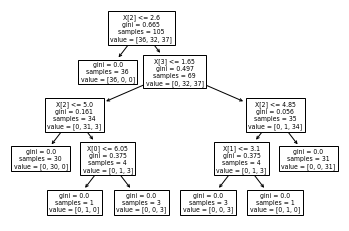

In [38]:
from sklearn import tree
tree.plot_tree(clf)  # added in version 0.21.3

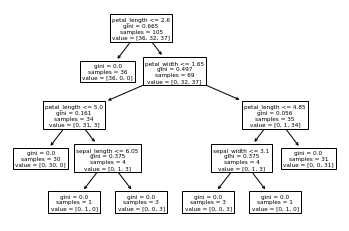

In [39]:
# save your tree into a file
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf,
               feature_names=[
                   'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
               ])  # added in version 0.21.3
plt.savefig('tree.svg', format='svg',
            bbox_inches='tight')  #svg, png, eps, etc.